# Helper Function

In [16]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl
import pandas as pd

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


#Loading the dataset

In [0]:
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width',
                                   'Petal Length', 'Petal Width', 
                                   'Species'], header=None)
iris = iris.dropna()

#Assignment

##ScatterPlot

###A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

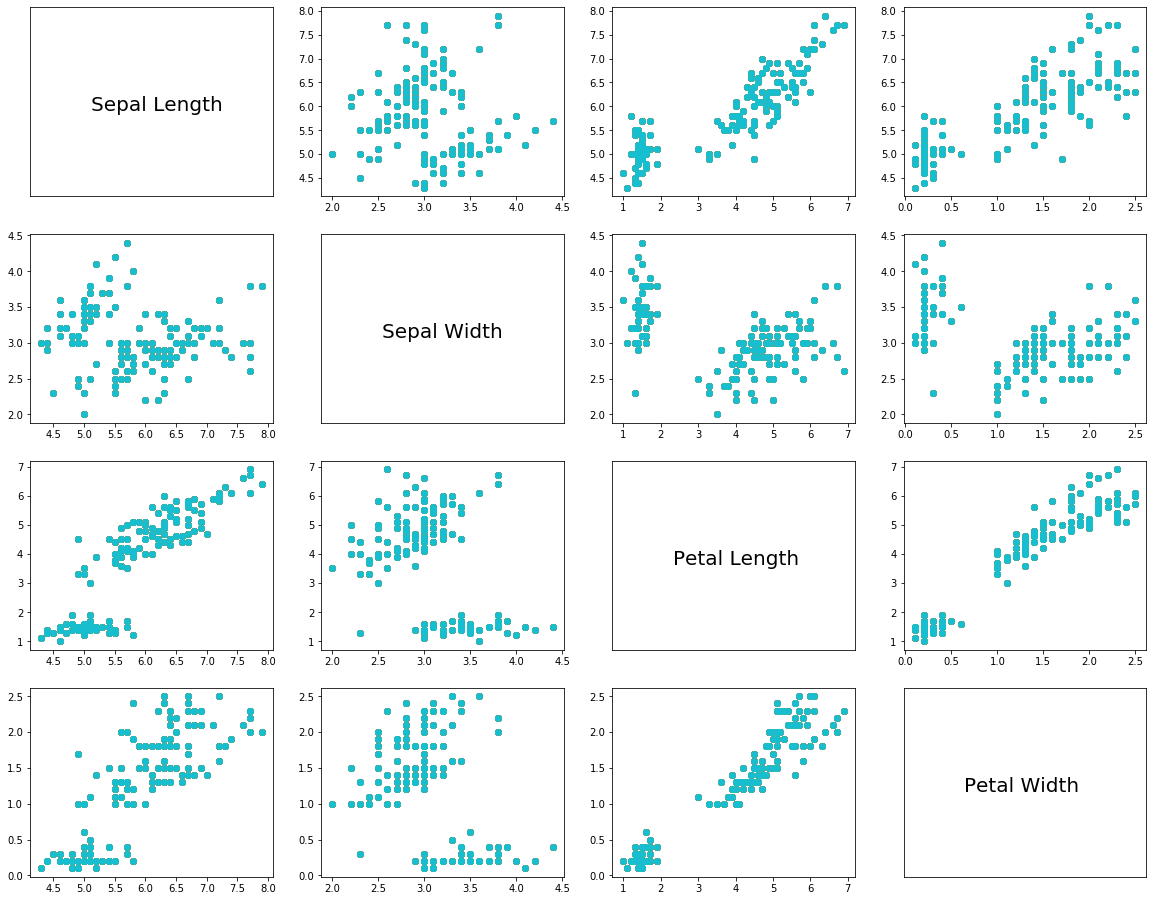

In [18]:
pairs(iris)

##Linear Regression Models

###A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [0]:
# Code source: Jaques Grobler
# License: BSD 3 clause

from sklearn import linear_model
from sklearn.model_selection import train_test_split

def plot_linear_regression_model_statistics(feature1, feature2, feature3):
    iris_X = None
    if (feature3):
        iris_X = iris.as_matrix([feature1, feature3])
    else:
        iris_X = iris.as_matrix([feature1])
        
    iris_Y = iris.as_matrix([feature2])
    
    iris_X_train, iris_X_test, iris_Y_train, iris_Y_test = train_test_split(iris_X, iris_Y, test_size=0.33, random_state=42)
    
    # Create Linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(iris_X_train, iris_Y_train)
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(iris_X_test) - iris_Y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(iris_X_test, iris_Y_test))

    # Plot outputs
    if (feature3 == None):
        plt.scatter(iris_X_test, iris_Y_test,  color='orange')
        plt.plot(iris_X_test, regr.predict(iris_X_test), color='blue',
                 linewidth=3)

        plt.xticks(())
        plt.yticks(())

        plt.show()

####Sepal Length to Sepal Width

Coefficients: 
 [[-0.02444726]]
Mean squared error: 0.22
Variance score: -0.08


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


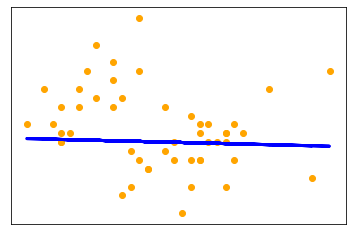

In [20]:
plot_linear_regression_model_statistics('Sepal Length', 'Sepal Width', None)

####Sepal Length to Petal Width

Coefficients: 
 [[0.7104469]]
Mean squared error: 0.17
Variance score: 0.73


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


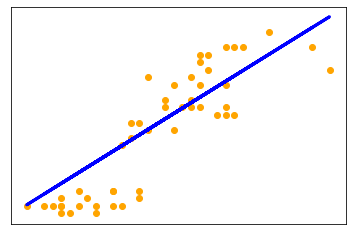

In [21]:
plot_linear_regression_model_statistics('Sepal Length', 'Petal Width', None)

####Sepal Length to Petal Length

Coefficients: 
 [[1.79648272]]
Mean squared error: 0.77
Variance score: 0.77


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


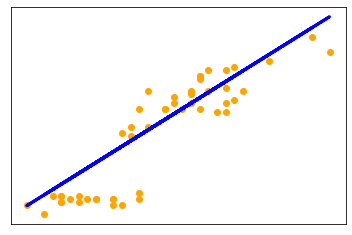

In [22]:
plot_linear_regression_model_statistics('Sepal Length', 'Petal Length', None)

####Petal Length to Sepal Length

Coefficients: 
 [[0.41657395]]
Mean squared error: 0.15
Variance score: 0.77


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


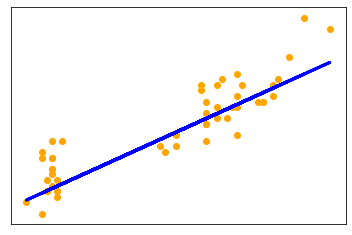

In [23]:
plot_linear_regression_model_statistics('Petal Length', 'Sepal Length', None)

####Petal Length to Sepal Width

Coefficients: 
 [[-0.08552093]]
Mean squared error: 0.17
Variance score: 0.16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


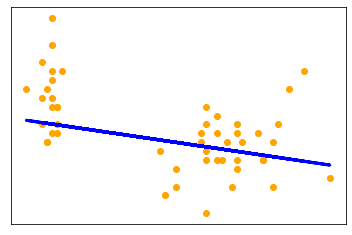

In [24]:
plot_linear_regression_model_statistics('Petal Length', 'Sepal Width', None)

####Petal Length to Petal Width

Coefficients: 
 [[0.41350253]]
Mean squared error: 0.04
Variance score: 0.94


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


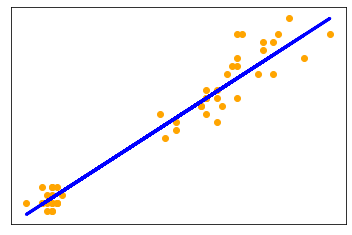

In [25]:
plot_linear_regression_model_statistics('Petal Length', 'Petal Width', None)

####Petal Width to Sepal Width

Coefficients: 
 [[-0.16239304]]
Mean squared error: 0.18
Variance score: 0.09


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


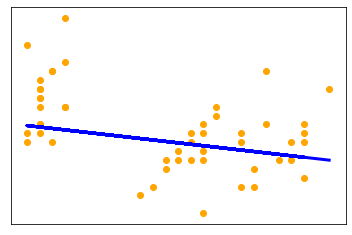

In [26]:
plot_linear_regression_model_statistics('Petal Width', 'Sepal Width', None)

####Petal Width to Sepal Length

Coefficients: 
 [[0.88457601]]
Mean squared error: 0.17
Variance score: 0.74


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


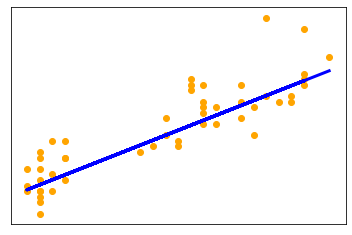

In [27]:
plot_linear_regression_model_statistics('Petal Width', 'Sepal Length', None)

####Petal Width to Petal Length

Coefficients: 
 [[2.22030508]]
Mean squared error: 0.19
Variance score: 0.94


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


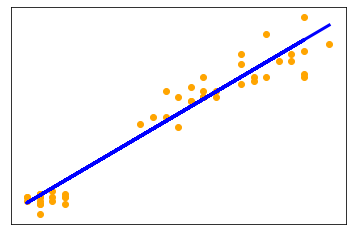

In [28]:
plot_linear_regression_model_statistics('Petal Width', 'Petal Length', None)

####Sepal Width to Sepal Length

Coefficients: 
 [[-0.09856213]]
Mean squared error: 0.65
Variance score: 0.01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


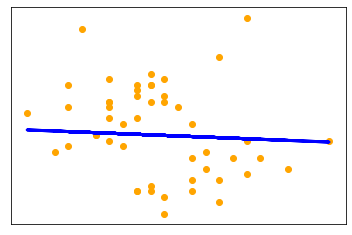

In [29]:
plot_linear_regression_model_statistics('Sepal Width', 'Sepal Length', None)

####Sepal Width to Petal Length

Coefficients: 
 [[-1.48690507]]
Mean squared error: 2.46
Variance score: 0.25


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


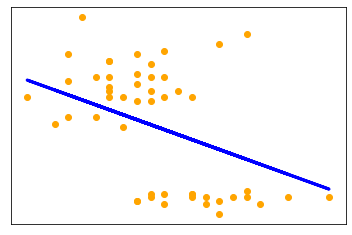

In [30]:
plot_linear_regression_model_statistics('Sepal Width', 'Petal Length', None)

####Sepal Width to Petal Width

Coefficients: 
 [[-0.52582806]]
Mean squared error: 0.51
Variance score: 0.19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


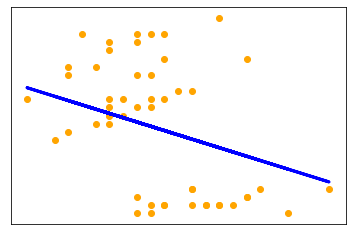

In [31]:
plot_linear_regression_model_statistics('Sepal Width', 'Petal Width', None)

###A plot of the best overall linear regression model you were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics.

In [32]:
plot_linear_regression_model_statistics('Sepal Width', 'Petal Width', 'Petal Length')

Coefficients: 
 [[0.10197872 0.42222385]]
Mean squared error: 0.03
Variance score: 0.94


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Here, we can see that the best overall linear regression model was for Sepal Width, Petal Width to Petal Length with the Coefficients: [[0.10197872 0.42222385]], a very little Mean squared error of 0.03 and a Variance score of 0.94

## Conceptual Questions



###Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

Based upon the linear regression models generated, we can distinctly infer the prediction of 'Petal Width' from 'Petal Length' involves the least Mean Squared error(0.04) and the Varience is very close to 1(0.94). The same can be inferred from the plot of the regression model.

###Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

The best predictable feature is that of the Petal Width. This implies that given the Petal Length or Sepal Width and Petal Length for a species, the Petal Width was predicted with the least Mean Squared error and Varience close to 1. This feature seems important because without it, the statistics point towards a decrease in the accuracy of the regression models. From the above generated regression plot, we can therefor infer, for each pairwise feature without the Petal Width feature included, the prediction of 'Petal Length' to 'Sepal Length' with a Mean Squared Error of 0.15 and Varience of 0.77 would be the next best. Thus the Petal Width feature is the most important because it affects the model accuracy if its not included.